# Tarefa - Álgebra Linear

A célula abaixo gera dados de notas de duas provas, p1 e p2, conforme em aula, mas com mais alunos.

## 1. Reduzindo correlações

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

### a) Já vimos que expressar os dados através da média e diferença é uma transformação linear. Obtenha a média e a diferença através de uma multiplicação matricial, conforme visto em aula.

In [2]:
# Gerando os dados
np.random.seed(123)

p1 = np.random.random(50) *10
p1[p1>10] = 10
p1[p1<0] = 0

p2 = p1 + np.random.normal(0,1,50)
p2[p2>10] = 10
p2[p2<0] = 0

df = pd.DataFrame({'p1': p1, 'p2': p2})
df.head()

,p1,p2
0,6.964692,7.943428
1,2.861393,5.099537
2,2.268515,0.974429
3,5.513148,4.474359
4,7.194690,8.938402


In [3]:
df.head().to_numpy().T

array([[6.96469186, 2.86139335, 2.26851454, 5.51314769, 7.1946897 ],
       [7.94342786, 5.09953669, 0.97442921, 4.47435948, 8.93840192]])

In [4]:
m = np.array([
    [.5, .5], # Cada coluna por linha é multiplicada por 0,5 e o resultado é soma, o que retorna a média
    [-1,  1]   # A primeira coluna é multiplicada por -1 e a segunda por 1, e somados, tendo como resultado, subtraí do segundo o primeiro valor
])
m

array([[ 0.5,  0.5],
       [-1. ,  1. ]])

In [5]:
df_rot = np.matmul(m, df.to_numpy().T).T
df_rot[:10]

array([[ 7.45405986,  0.97873601],
       [ 3.98046502,  2.23814334],
       [ 1.62147187, -1.29408532],
       [ 4.99375359, -1.03878821],
       [ 8.06654581,  1.74371223],
       [ 3.83203323, -0.79806274],
       [ 9.8224836 ,  0.02968323],
       [ 7.38295537,  1.06931597],
       [ 5.25467221,  0.89070639],
       [ 4.79861827,  1.75488618]])

In [6]:
def grafico_scatter(df: pd.DataFrame, m: np.array, xmax: int = 15) -> None:

    #Definindo figura e configurando eixos
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(1,1,1)

    # xmax = 15
    xmin = xmax*-1
    ymax = xmax
    ymin = xmin

    # ax.axis('equal')
    ax.set_aspect('equal', 'box')
    ax.set(xlim=(xmin, xmax), ylim=(ymin, ymax))

    lista_xticks = list(range(int(xmin), int(xmax)+1))
    ax.set_xticks(lista_xticks)
    ax.set_xticklabels(lista_xticks, fontsize='large')

    lista_yticks = list(range(int(ymin), int(ymax)+1))
    ax.set_yticks(lista_yticks)
    ax.set_yticklabels(lista_yticks, fontsize='large')

    # Vetores coluna da matriz de transformação
    ax.arrow(0, 0, m[0,0], m[1,0]
             , head_width=0.25
             , head_length=0.1
             , fc='g', ec='g', 
             length_includes_head=True)

    ax.arrow(0, 0, m[0,1], m[1,1]
             , head_width=0.25
             , head_length=0.1
             , fc='r', ec='r', 
             length_includes_head=True)


    #linhas horizontais e verticais de referência
    ax.axvline(0, linewidth=.5, linestyle='--')
    ax.axhline(0, linewidth=.5, linestyle='--')

    #Transformação linear
    df_rot = np.matmul(m, df[['p1', 'p2']].to_numpy().transpose())

    # Plotar os dados originais
    plt.scatter(df['p1'], df['p2'], label='originais')

    # Plotar os dados transformados
    plt.scatter(df_rot[0,:], df_rot[1,:], label='rotação')

    #Legenda
    plt.legend(loc='lower right')

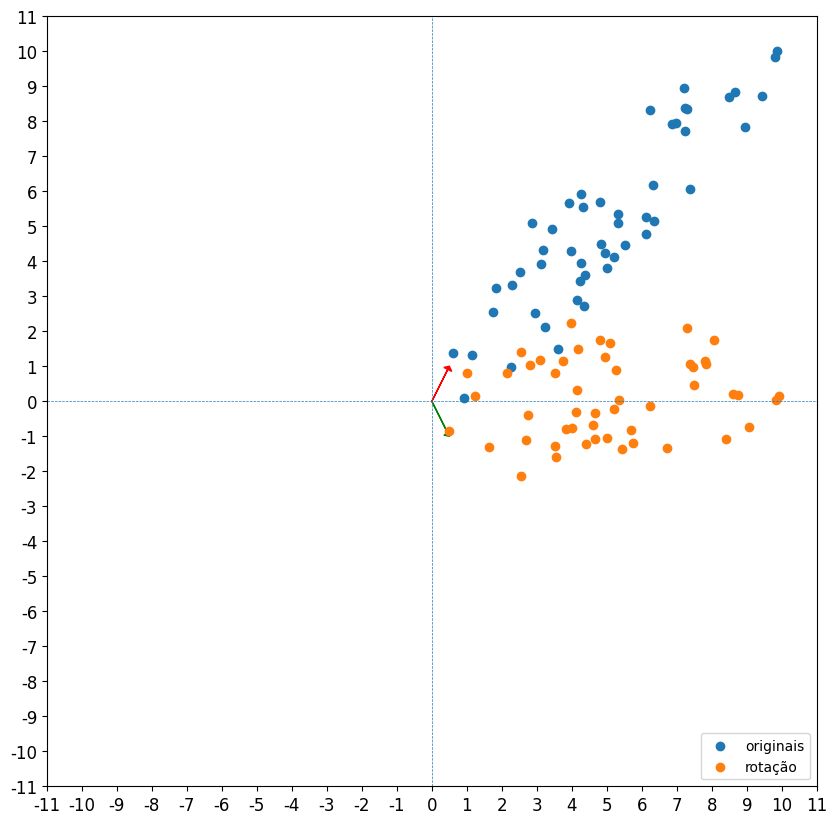

In [7]:
grafico_scatter(df=df, m=m, xmax=11)

### b) Calcule a correlação entre os dados da **p1** e **p2**

d:\OneDrive\Program\01 - scripts-base\EBAC\ebac_env\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\OneDrive\Program\01 - scripts-base\EBAC\ebac_env\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


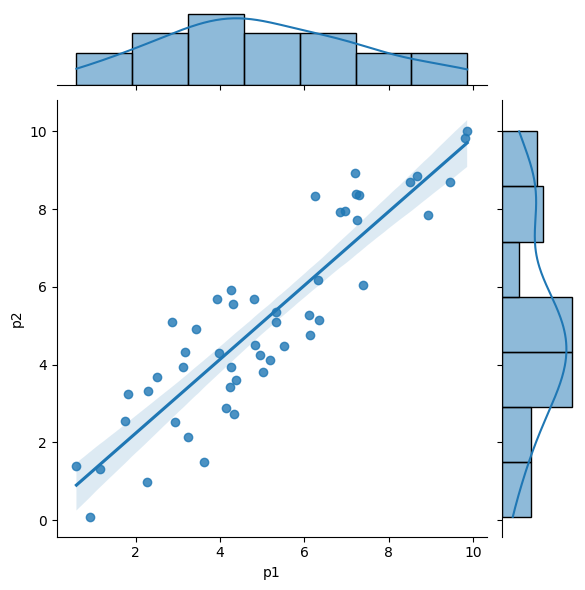

In [8]:
sns.jointplot(
    x="p1",
    y="p2",
    kind='reg',
    data=df
)
plt.show()

### c) Calcule a correlação entre os dados transformados (média e diferença)

In [9]:
df_exerc_1 = df.copy()

df_rot = np.matmul(m, df[['p1', 'p2']].to_numpy().T).T
df_exerc_1['media'] = df_rot[:,0]
df_exerc_1['expan'] = df_rot[:,1]
df_exerc_1.head()

,p1,p2,media,expan
0,6.964692,7.943428,7.454060,0.978736
1,2.861393,5.099537,3.980465,2.238143
2,2.268515,0.974429,1.621472,-1.294085
3,5.513148,4.474359,4.993754,-1.038788
4,7.194690,8.938402,8.066546,1.743712


d:\OneDrive\Program\01 - scripts-base\EBAC\ebac_env\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\OneDrive\Program\01 - scripts-base\EBAC\ebac_env\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


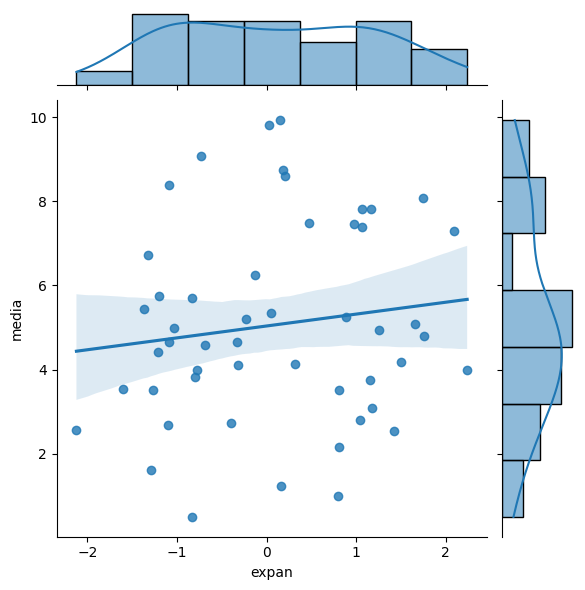

In [20]:
sns.jointplot(
    x="expan",
    y="media",
    kind='reg',
    data=df_exerc_1
)
plt.show()

### d) Comente as correlações observadas.

R.: Observa-se que a correlação entre os dados originais é superior à observada nas transforadas. A questão é que a geração dos dados originais é relacionado, pois temos em p2 uma soma randomica dos valores em p1.

## 2. Soma e diferença

Realize agora uma transformação semelhante, mas que ao invés da média, dê a soma da **p1** e **p2**. Construa o gráfico e conclua que diferenças visuais você observa.

In [25]:
m = np.array([
    [ 1, 1], # A primeira coluna é multiplicada por 1 e a segunda por 1, e somados, tendo como resultado, subtraí do segundo o primeiro valor
    [ -1, 1], # A primeira coluna é multiplicada por 1 e a segunda por 1, e somados, tendo como resultado, subtraí do segundo o primeiro valor
])
m

array([[ 1,  1],
       [-1,  1]])

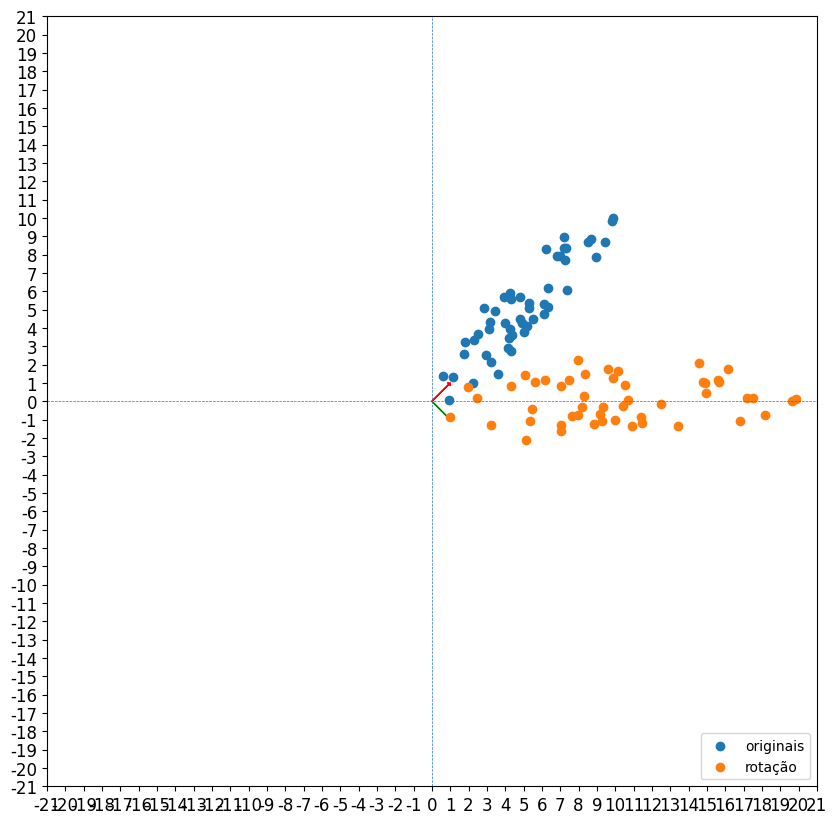

In [26]:
grafico_scatter(df=df, m=m, xmax=21)

R.: A transformação de soma amplia a distância entre os pontos, porém mantêm a proposção. 